Primeiramente iremos intalar as bibliotecas e carregar o arquivo csv. Exibirei apenas as 5 primeiras linhas para ter uma breve análise do meu arquivo

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

precificacao_df = pd.read_csv ('teste_indicium_precificacao.csv')
precificacao_df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Retirando as colunas de de identificação 

In [47]:
precificacao_df=precificacao_df.drop(['id','host_id','nome','host_name'], axis=1)

Informação dos dados

In [48]:
precificacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   48894 non-null  object 
 1   bairro                         48894 non-null  object 
 2   latitude                       48894 non-null  float64
 3   longitude                      48894 non-null  float64
 4   room_type                      48894 non-null  object 
 5   price                          48894 non-null  int64  
 6   minimo_noites                  48894 non-null  int64  
 7   numero_de_reviews              48894 non-null  int64  
 8   ultima_review                  38842 non-null  object 
 9   reviews_por_mes                38842 non-null  float64
 10  calculado_host_listings_count  48894 non-null  int64  
 11  disponibilidade_365            48894 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usag

Valores nulos 

In [49]:
precificacao_df.isnull().sum()

bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Análise mais detalhada de como os dados estão distribuidos

In [50]:
precificacao_df.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Análise dos dados de forma gráfica

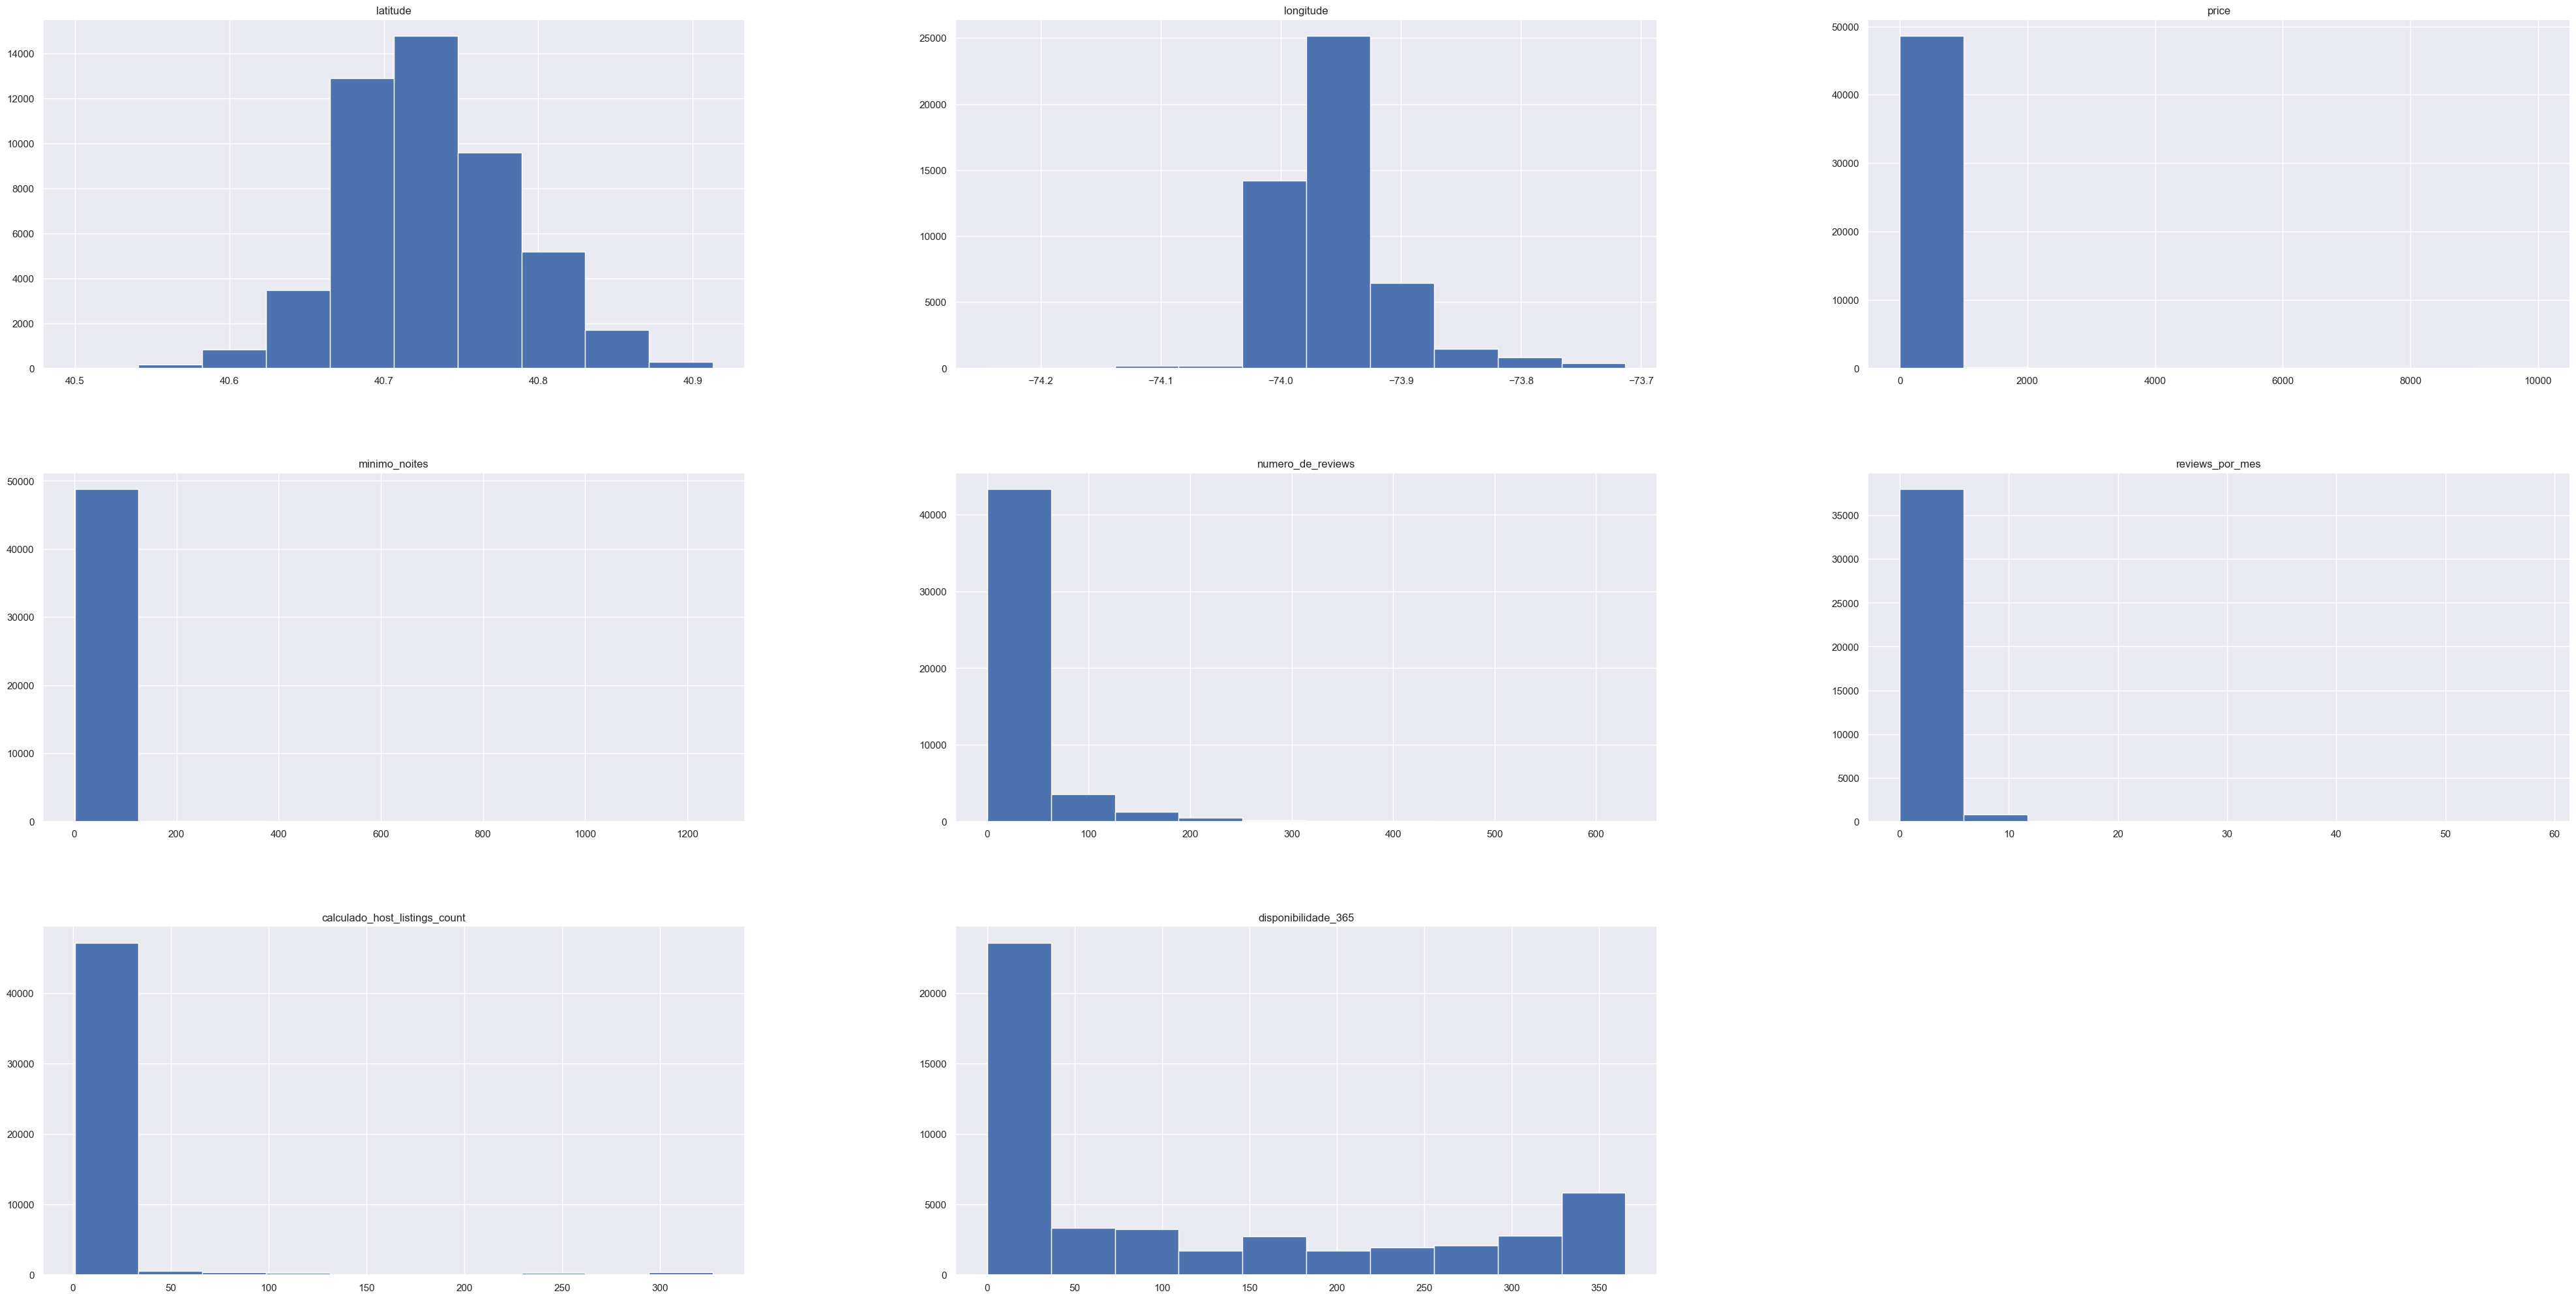

In [67]:
precificacao_df.hist(figsize=(50,25))
plt.show()


Bairro_group

In [165]:
precificacao_df['bairro_group'].value_counts()

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Demonstração gráfica 

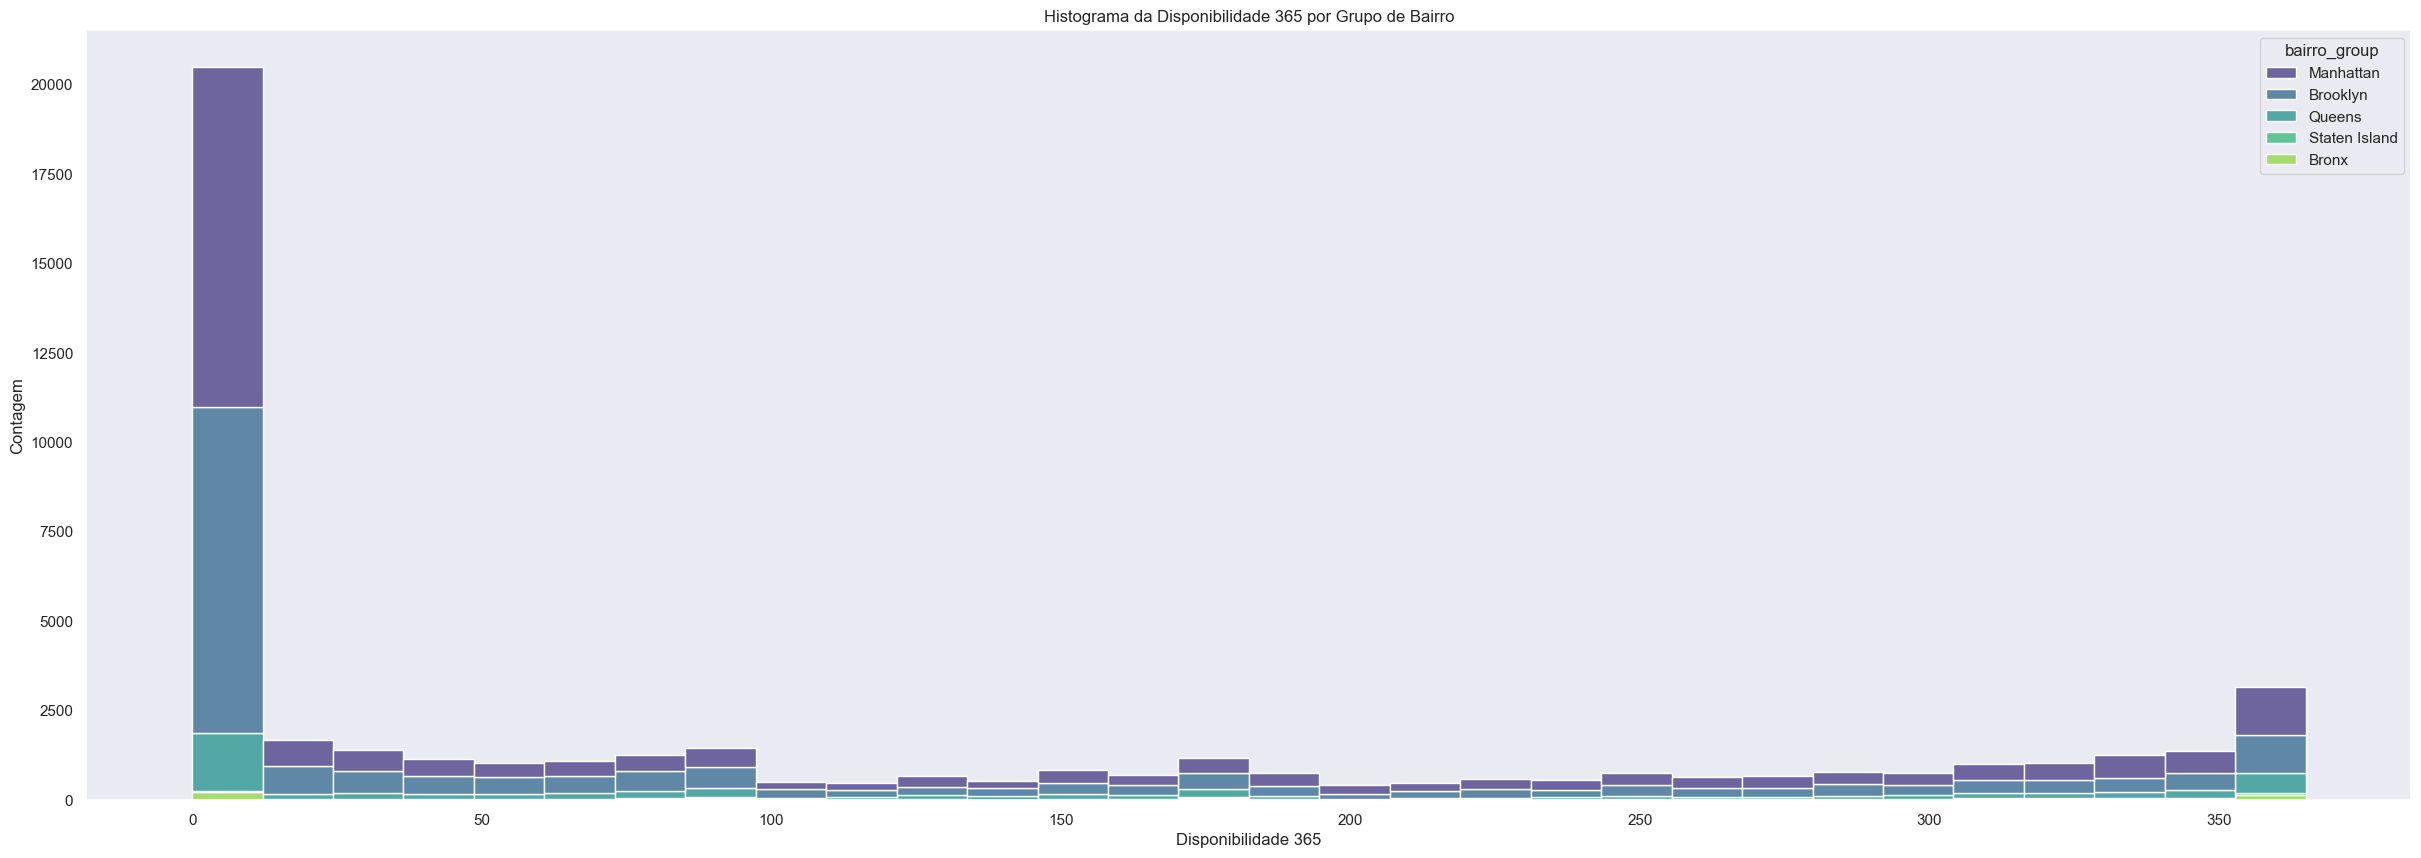

In [166]:
plt.figure(figsize=(30, 10))
ax = sns.histplot(data=precificacao_df, x='disponibilidade_365', hue='bairro_group', palette='viridis', multiple='stack', bins=30)

plt.xlabel('Disponibilidade 365')
plt.ylabel('Contagem')
plt.title('Histograma da Disponibilidade 365 por Grupo de Bairro')

plt.show()

Bairro

In [167]:
precificacao_df['bairro'].value_counts().head(5)


bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: count, dtype: int64

Room_type

In [168]:
precificacao_df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64

Média

Gráfico mostrando a média de preço nos top 5 bairros

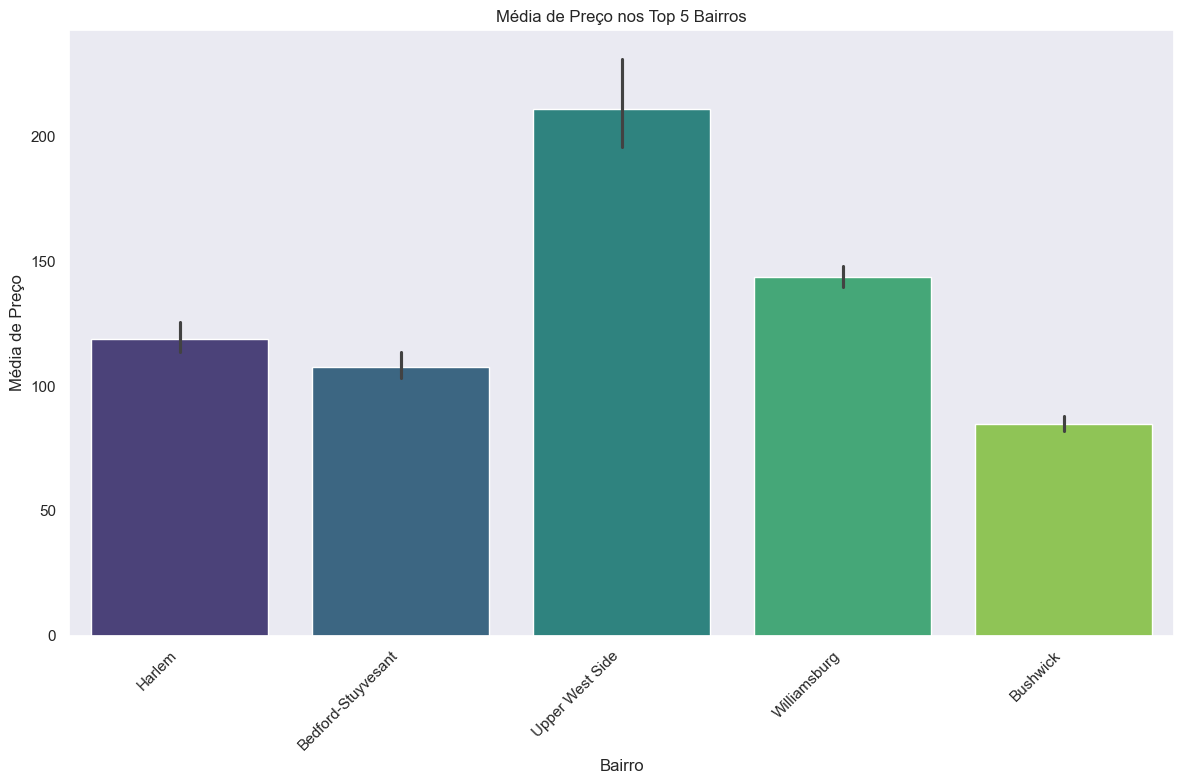

In [210]:
top_5_bairros = precificacao_df['bairro'].value_counts().head(5).index

df_top_5_bairros = precificacao_df[precificacao_df['bairro'].isin(top_5_bairros)]

plt.figure(figsize=(12, 8))
sns.barplot(x='bairro', y='price', data=df_top_5_bairros, hue='bairro', palette='viridis', dodge=False)
plt.legend([],[], frameon=False)
plt.title("Média de Preço nos Top 5 Bairros")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Média de Preço')
plt.xlabel('Bairro')

plt.tight_layout()
plt.show()

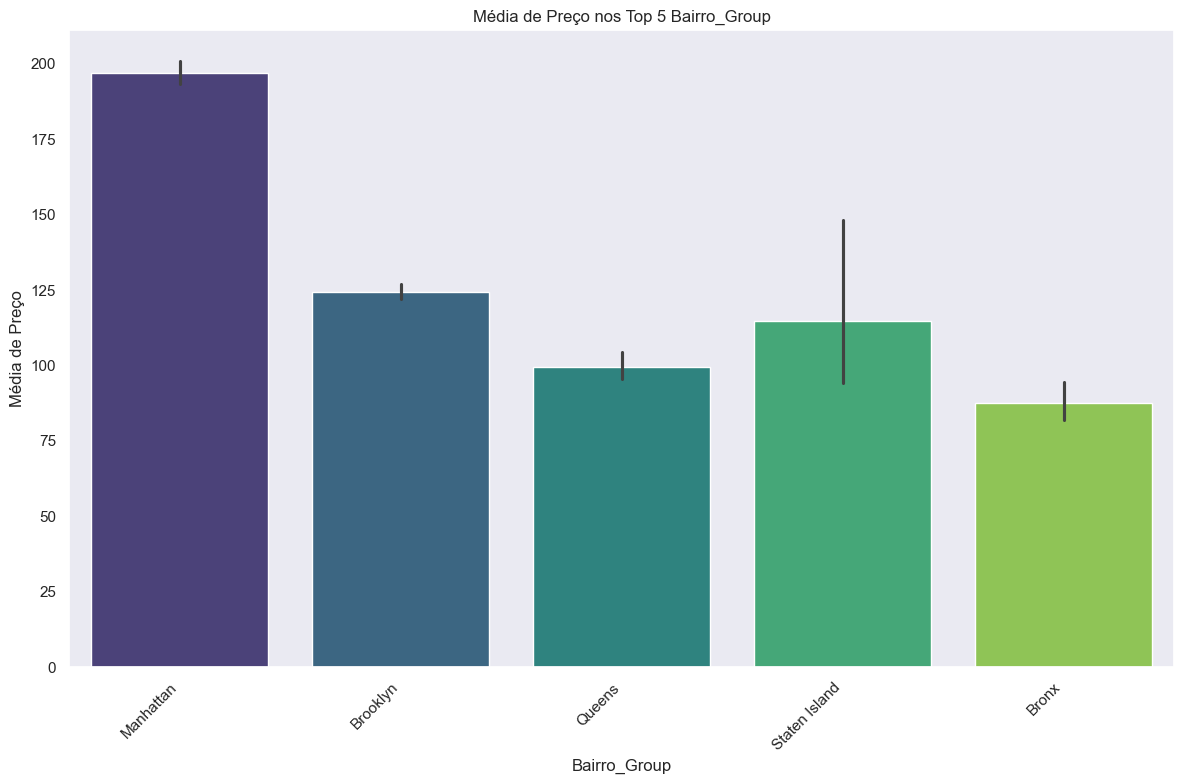

In [211]:
top_5_bairro_group = precificacao_df['bairro_group'].value_counts().head(5).index

df_top_5_bairro_group = precificacao_df[precificacao_df['bairro_group'].isin(top_5_bairro_group)]

plt.figure(figsize=(12, 8))
sns.barplot(x='bairro_group', y='price', data=df_top_5_bairro_group, hue='bairro_group', palette='viridis', dodge=False)
plt.legend([],[], frameon=False)
plt.title("Média de Preço nos Top 5 Bairro_Group")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Média de Preço')
plt.xlabel('Bairro_Group')

plt.tight_layout()
plt.show()

Com base nos dados coletados até agora, se a pessoa quer um local de classe mais alta, manhattan seria o melhor local para se morar e por sua disponibilidade. Porém se está procurando um local mais acessível o bronx pode atender seu desejo. 

In [212]:
df_valor_max = precificacao_df[precificacao_df['price']>300]
     

In [213]:
df_valor_max ['bairro_group'].value_counts()


bairro_group
Manhattan        2452
Brooklyn          766
Queens            107
Bronx              24
Staten Island       8
Name: count, dtype: int64

In [214]:
df_valor_max ['bairro'].value_counts().head(10)


bairro
Midtown               437
Hell's Kitchen        248
Williamsburg          224
Upper West Side       217
Chelsea               193
East Village          164
Upper East Side       139
West Village          135
Financial District    107
SoHo                   92
Name: count, dtype: int64

In [215]:
df_valor_max [df_valor_max ['bairro_group']=='Manhattan']['bairro'].value_counts().head(10)


bairro
Midtown               437
Hell's Kitchen        248
Upper West Side       217
Chelsea               193
East Village          164
Upper East Side       139
West Village          135
Financial District    107
SoHo                   92
Tribeca                82
Name: count, dtype: int64

Baseado nos dados acima, há um padrão no local mais caro e Manhattan é quem domina